# Разные классификаторы, гиперпараметры, веса

## Данные

https://drive.google.com/open?id=1eDq0dDWM7601IPbr0lAbO3n9qZC1UYeO

Как обычно, сначала загрузим данные и посмотрим на них.

In [1]:
import pandas as pd

In [29]:
# для колаба:
# 1. запускаете эту ячейку
# 2. ждёте
# 3. внизу появляется кнопка с загрузкой с компьютера
# 4. выбираете файл на компьютере и загружаете 
from google.colab import files
uploaded = files.upload()

In [2]:
df = pd.read_csv('news_lenta_cropped.csv')

In [3]:
df.head()

,title,topic
0,Грудь Бритни Спирс вновь выскочила из лифчика ...,Культура
1,Попытка вернуть укатившийся мяч у Кремлевской ...,Силовые структуры
2,Хабенский стал врагом Украины,Культура
3,В Туркмении запретили продажу алкоголя,Бывший СССР
4,В Великобритании нашли утерянный сценарий Стен...,Культура


In [5]:
len(df)

129930

### Задание 1

Сколько всего значений принимает `topic`? Сколько объектов относится к каждому из топиков?

## Baseline

Посмотрим, как с классификацией справится наивный байес и CountVectorizer с дефолтными настройками.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [6]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df.title)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(bow, df.topic)

In [13]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, clf.predict(X_test)))

                   precision    recall  f1-score   support

      Бывший СССР       0.92      0.97      0.94     12931
         Культура       0.96      0.94      0.95     13301
Силовые структуры       0.89      0.86      0.87      4635
         Ценности       0.92      0.78      0.84      1616

      avg / total       0.93      0.93      0.93     32483



### Задание 2

Попробуйте `TfidfVectorizer`. Попробуйте разные значения `min_df` и `max_df`.

## LogReg и веса классов

In [11]:
two_classes = df[(df.topic == 'Культура') | (df.topic == 'Бывший СССР')]

In [12]:
two_classes.head()

,title,topic
0,Грудь Бритни Спирс вновь выскочила из лифчика ...,Культура
2,Хабенский стал врагом Украины,Культура
3,В Туркмении запретили продажу алкоголя,Бывший СССР
4,В Великобритании нашли утерянный сценарий Стен...,Культура
5,Сотня горняков под Луганском оказалась заблоки...,Бывший СССР


In [9]:
from sklearn.linear_model import LogisticRegression

In [15]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(two_classes.title)
X_train, X_test, y_train, y_test = train_test_split(bow, two_classes.topic)
clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/maryszmary/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

 Бывший СССР       0.98      0.97      0.98     13016
    Культура       0.97      0.98      0.98     13139

    accuracy                           0.98     26155
   macro avg       0.98      0.98      0.98     26155
weighted avg       0.98      0.98      0.98     26155



In [18]:
clf.coef_

array([[ 4.48144510e-02, -7.70226053e-02,  6.53874111e-01, ...,
        -3.15552130e-02, -2.05080560e-03,  9.54983150e-05]])

### Задание

Найдите самый значимый признак.

## Подбор параметров

### Вручную

In [21]:
lr = LogisticRegression(C=7, random_state=42)
clf = lr.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

 Бывший СССР       0.98      0.98      0.98     13016
    Культура       0.98      0.98      0.98     13139

    accuracy                           0.98     26155
   macro avg       0.98      0.98      0.98     26155
weighted avg       0.98      0.98      0.98     26155



### В цикле

### Grid Search

Самый продвинутый и out-of-box способ делать это.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

### Confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test, nb.predict(X_test))

array([[12757,   120],
       [  403, 12875]])

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

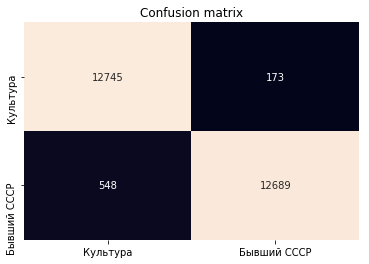

In [46]:
categories = ['Культура', 'Бывший СССР']
sns.heatmap(data=confusion_matrix(y_test, nb.predict(X_test)), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

### Задание:
Нарисуйте то же самое для 4 классов.

### А теперь давайте попробуем другие классификаторы

In [19]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Задание:
Попробуйте kNN с разным количеством соседей.

### Задание:
Попробуйте все классификаторы и поиграйте с их гиперпараметрами.